# Questions:
### What is the best way to optimize a story based on metrics?
### What Metrics are most important for upvotes and following conversations?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('storiesDB.xlsx')
df.sample(5)

id             subreddit        date time_of_day  title_length  \
3649   15gttep            Paranormal  08-03-2023    Midnight            25   
15102   ocx94s         AmItheAsshole  07-03-2021     Morning           137   
15681  16oj5w8             JUSTNOMIL  09-21-2023     Morning            59   
7992    gu50p9  talesfromcallcenters  05-31-2020   Afternoon            73   
10186   8a2dd6       TalesFromRetail  04-05-2018   Afternoon            41   

       title_word_count  title_avg_word_length  title_syllables  \
3649                  6                  3.333                7   
15102                27                  4.074               33   
15681                13                  3.615               15   
7992                 15                  3.933               19   
10186                 9                  3.556                8   

       title_reading_score  title_reading_grade  ... amount_sentences  \
3649                 83.32    1st and 2nd grade  ...               48   
15102                77.91  10th and 11th grade  ...               23   
15681                92.12    2nd and 3rd grade  ...                8   
7992                 81.63    4th and 5th grade  ...               75   
10186               114.12    2nd and 3rd grade  ...               33   

       avg_words_per_sentence  avg_syllables_per_sentence  \
3649                   15.625                      19.354   
15102                  21.174                      27.478   
15681                  12.500                      16.875   
7992                   11.947                      15.133   
10186                  13.848                      17.333   

       avg_polarity_per_sentence  avg_subjectivity_per_sentence  \
3649                       0.024                          0.309   
15102                      0.042                          0.275   
15681                     -0.054                          0.260   
7992                      -0.029                          0.149   
10186                      0.088                          0.281   

       avg_readscore_per_sentence  num_comments  upvotes upvote_ratio  \
3649                       82.937           272      578         0.93   
15102                      73.180          5257    81011         0.92   
15681                      72.538           298     2458         0.98   
7992                       91.454            44     1258         0.99   
10186                      88.052           231     3219         0.98   

      downvotes  
3649         43  
15102      7044  
15681        50  
7992         12  
10186        65  

[5 rows x 32 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22722 entries, 0 to 22721
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             22722 non-null  object 
 1   subreddit                      22722 non-null  object 
 2   date                           22722 non-null  object 
 3   time_of_day                    22722 non-null  object 
 4   title_length                   22722 non-null  int64  
 5   title_word_count               22722 non-null  int64  
 6   title_avg_word_length          22722 non-null  float64
 7   title_syllables                22722 non-null  int64  
 8   title_reading_score            22722 non-null  float64
 9   title_reading_grade            22722 non-null  object 
 10  title_reading_difficulty       22722 non-null  object 
 11  title_polarity                 22722 non-null  float64
 12  title_subjectivity             22722 non-null 

In [4]:
df.describe()

title_length  title_word_count  title_avg_word_length  title_syllables  \
count  22722.000000      22722.000000           22722.000000     22722.000000   
mean      66.199542         12.428924               4.365949        16.587580   
std       47.515943          8.745877               1.012018        11.836946   
min        1.000000          0.000000               0.000000         0.000000   
25%       35.000000          7.000000               3.769000         9.000000   
50%       55.000000         10.000000               4.222000        14.000000   
75%       82.000000         16.000000               4.750000        21.000000   
max      300.000000         64.000000              38.000000        81.000000   

       title_reading_score  title_polarity  title_subjectivity  story_length  \
count         22722.000000    22722.000000        22722.000000  22722.000000   
mean             79.540065        0.016017            0.263346   3279.753499   
std              25.452212        0.261677            0.323674   4047.723741   
min            -470.990000       -1.000000            0.000000      1.000000   
25%              67.760000        0.000000            0.000000   1210.000000   
50%              82.650000        0.000000            0.067000   2116.000000   
75%              94.490000        0.025000            0.500000   3590.000000   
max             206.840000        1.000000            1.000000  39996.000000   

       story_word_count  story_avg_word_length  ...  amount_sentences  \
count      22722.000000           22722.000000  ...      22722.000000   
mean         613.895696               4.126624  ...         40.342311   
std          747.653560               0.444081  ...         57.619713   
min            0.000000               0.000000  ...          0.000000   
25%          229.000000               3.909000  ...         13.000000   
50%          401.000000               4.059000  ...         24.000000   
75%          673.000000               4.237000  ...         43.000000   
max         7709.000000              25.545000  ...        864.000000   

       avg_words_per_sentence  avg_syllables_per_sentence  \
count            22722.000000                22722.000000   
mean                17.526568                   22.701236   
std                 17.072659                   20.582044   
min                  0.000000                    0.000000   
25%                 13.042250                   16.583000   
50%                 16.273000                   20.922000   
75%                 20.000000                   26.077000   
max               1969.000000                 2237.000000   

       avg_polarity_per_sentence  avg_subjectivity_per_sentence  \
count               22722.000000                   22722.000000   
mean                    0.043419                       0.317529   
std                     0.084424                       0.103186   
min                    -1.000000                       0.000000   
25%                    -0.001000                       0.254000   
50%                     0.037000                       0.312000   
75%                     0.082000                       0.376000   
max                     1.000000                       1.000000   

       avg_readscore_per_sentence  num_comments        upvotes  upvote_ratio  \
count                22722.000000  22722.000000   22722.000000  22722.000000   
mean                    75.969789    573.939882    8208.830957      0.956159   
std                     42.034567   1154.060567   12108.919243      0.049234   
min                  -3431.990000      0.000000       0.000000      0.370000   
25%                     73.243250     80.000000    1239.250000      0.950000   
50%                     80.448000    198.000000    3376.000000      0.970000   
75%                     86.304000    484.000000    8920.000000      0.990000   
max                    206.840000  22821.000000  216188.000000      1.000000   

           downvotes  


In [5]:
df['title_word_count'].median()

10.0

### Fixing general errors with the dataset

In [53]:
#Basically just fixes the reading scores to be within the correct range, there as an error where the scores went beyond and thus this just keeps the data with proper read scores

rd_score_cols = ['story_reading_score', 'title_reading_score', 'avg_readscore_per_sentence']
def fix_rd_score(data, col):
    return data[(data[col] >= 0) & (data[col] < 122)]

for col in rd_score_cols:
    df = fix_rd_score(df, col)
    
df.shape

(22168, 32)

In [7]:
def graph(grpby, sort_by, legend, xlbl, ylbl, title, plot):
    df.groupby(grpby).count().sort_values(by=[sort_by])['upvotes'].plot(kind=plot)
    plt.legend([legend])
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(title)

### Graph: Aiming to see how upvotes change depending on time of day

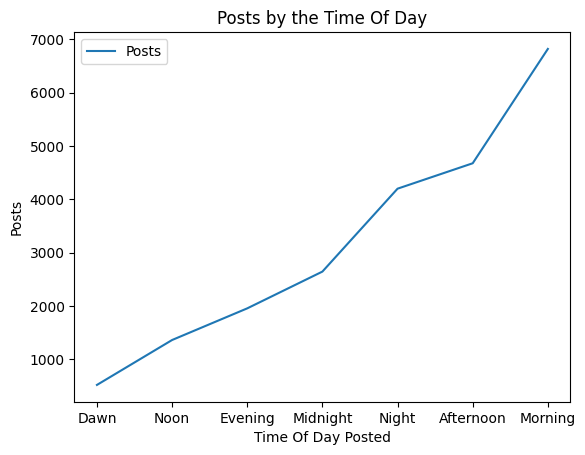

In [8]:
graph('time_of_day', 'upvotes', 'Posts', 'Time Of Day Posted', 'Posts', 'Posts by the Time Of Day', 'line')

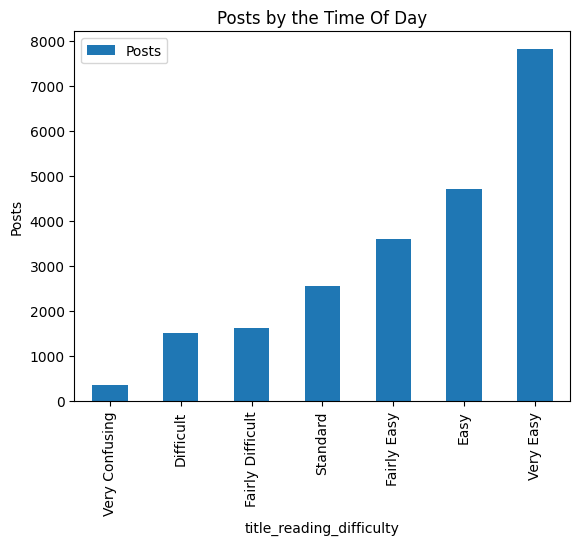

In [9]:
graph('title_reading_difficulty', 'upvotes', 'Posts', 'title_reading_difficulty', 'Posts', 'Posts by the Time Of Day', 'bar')

# Correlation of df

In [10]:
df.corr(numeric_only=True)

title_length  title_word_count  \
title_length                       1.000000          0.981017   
title_word_count                   0.981017          1.000000   
title_avg_word_length             -0.002125         -0.142968   
title_syllables                    0.990260          0.972944   
title_reading_score               -0.228024         -0.120409   
title_polarity                     0.030933          0.037177   
title_subjectivity                 0.176591          0.175193   
story_length                       0.113318          0.105586   
story_word_count                   0.092077          0.088101   
story_avg_word_length              0.302976          0.242472   
story_syllables                    0.111662          0.104487   
story_reading_score               -0.347038         -0.300844   
story_polarity                     0.061944          0.063293   
story_subjectivity                -0.027597         -0.015877   
amount_sentences                   0.014549          0.016150   
avg_words_per_sentence             0.146537          0.143227   
avg_syllables_per_sentence         0.192613          0.180040   
avg_polarity_per_sentence          0.071758          0.072933   
avg_subjectivity_per_sentence      0.074689          0.083312   
avg_readscore_per_sentence        -0.337187         -0.295054   
num_comments                       0.176413          0.166226   
upvotes                            0.161831          0.160523   
upvote_ratio                      -0.211332         -0.201829   
downvotes                          0.148612          0.138192   

                               title_avg_word_length  title_syllables  \
title_length                               -0.002125         0.990260   
title_word_count                           -0.142968         0.972944   
title_avg_word_length                       1.000000        -0.003130   
title_syllables                            -0.003130         1.000000   
title_reading_score                        -0.666983        -0.290690   
title_polarity                             -0.033628         0.029470   
title_subjectivity                         -0.002262         0.177479   
story_length                                0.013067         0.108462   
story_word_count                            0.003334         0.087962   
story_avg_word_length                       0.202010         0.295396   
story_syllables                             0.011533         0.107536   
story_reading_score                        -0.136105        -0.350022   
story_polarity                             -0.019936         0.063042   
story_subjectivity                         -0.035031        -0.025305   
amount_sentences                           -0.003306         0.011624   
avg_words_per_sentence                     -0.003818         0.148516   
avg_syllables_per_sentence                  0.026096         0.195291   
avg_polarity_per_sentence                  -0.017921         0.072544   
avg_subjectivity_per_sentence              -0.027551         0.079908   
avg_readscore_per_sentence                 -0.125088        -0.339681   
num_comments                                0.021543         0.191699   
upvotes                                    -0.007266         0.185854   
upvote_ratio                               -0.006443        -0.221695   
downvotes                                   0.021246         0.163777   

                               title_reading_score  title_polarity  \
title_length                             -0.228024        0.030933   
title_word_count                         -0.120409        0.037177   
title_avg_word_length                    -0.666983       -0.033628   
title_syllables                          -0.290690        0.029470   
title_reading_score                       1.000000        0.020816   
title_polarity                            0.020816        1.000000   
title_subjectivity                       -0.066145       -0.028241   
story_length       

# Heat Map of Correlations

Heat map doesn't seem to show anything too significant, it seems that most the relationships are nonlinear. There a relationships, but nothing with the success metrics.

In [56]:
def heatmap(data):
    plt.rcParams['figure.figsize'] = (20, 20)
    sns.heatmap(data.corr(numeric_only=True).apply(lambda x: round(x, 3)), annot=True, cmap='coolwarm')
    plt.show()

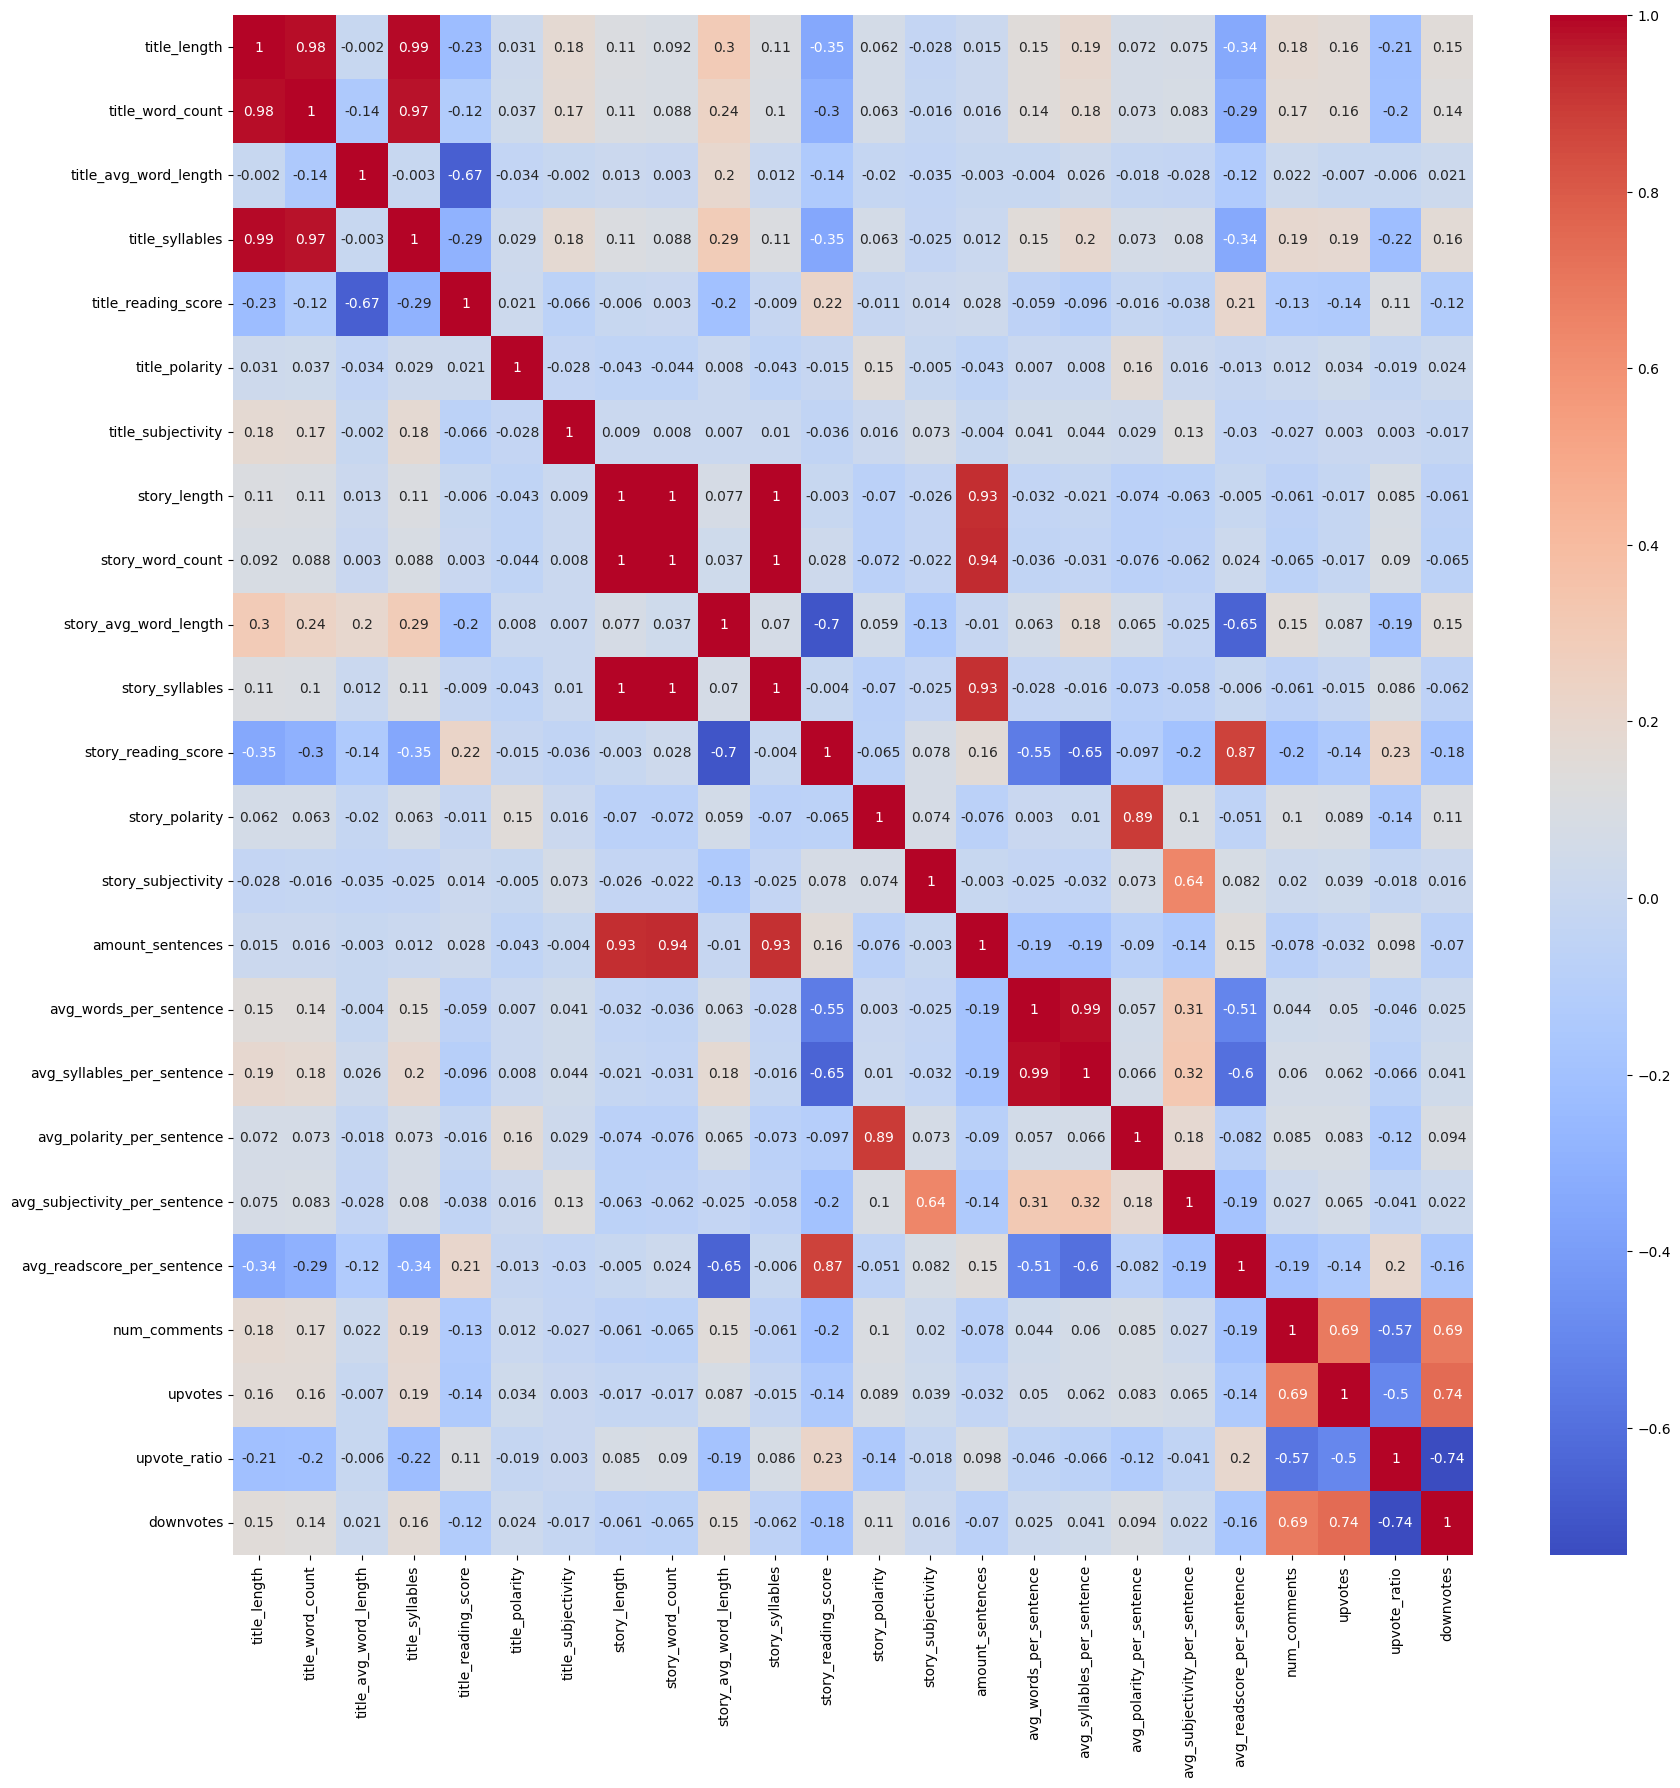

In [57]:
heatmap(df)

In [40]:
success_metrics = ['num_comments', 'upvotes', 'downvotes']
numerical_columns = [col for col in df.select_dtypes(include='number').columns.tolist() if col not in success_metrics]
df.columns

Index(['id', 'subreddit', 'date', 'time_of_day', 'title_length',
       'title_word_count', 'title_avg_word_length', 'title_syllables',
       'title_reading_score', 'title_reading_grade',
       'title_reading_difficulty', 'title_polarity', 'title_subjectivity',
       'story_length', 'story_word_count', 'story_avg_word_length',
       'story_syllables', 'story_reading_score', 'story_reading_grade',
       'story_reading_difficulty', 'story_polarity', 'story_subjectivity',
       'amount_sentences', 'avg_words_per_sentence',
       'avg_syllables_per_sentence', 'avg_polarity_per_sentence',
       'avg_subjectivity_per_sentence', 'avg_readscore_per_sentence',
       'num_comments', 'upvotes', 'upvote_ratio', 'downvotes'],
      dtype='object')

In [74]:
def normalize_df(data, cols, metrics, eps, kind):
    result = pd.DataFrame()
    if kind == 1:
        result[cols] = data[cols] + eps
        result = np.log1p(result[cols])
    elif kind == 2:
        result[cols] = data[cols].map(lambda x: x if x >= 0 else eps)
        result = np.sqrt(result[cols])
    elif kind == 3:
        result[cols] = data[cols]
        result = np.cbrt(result[cols])
        
    result[metrics] = data[metrics]
    
    return result

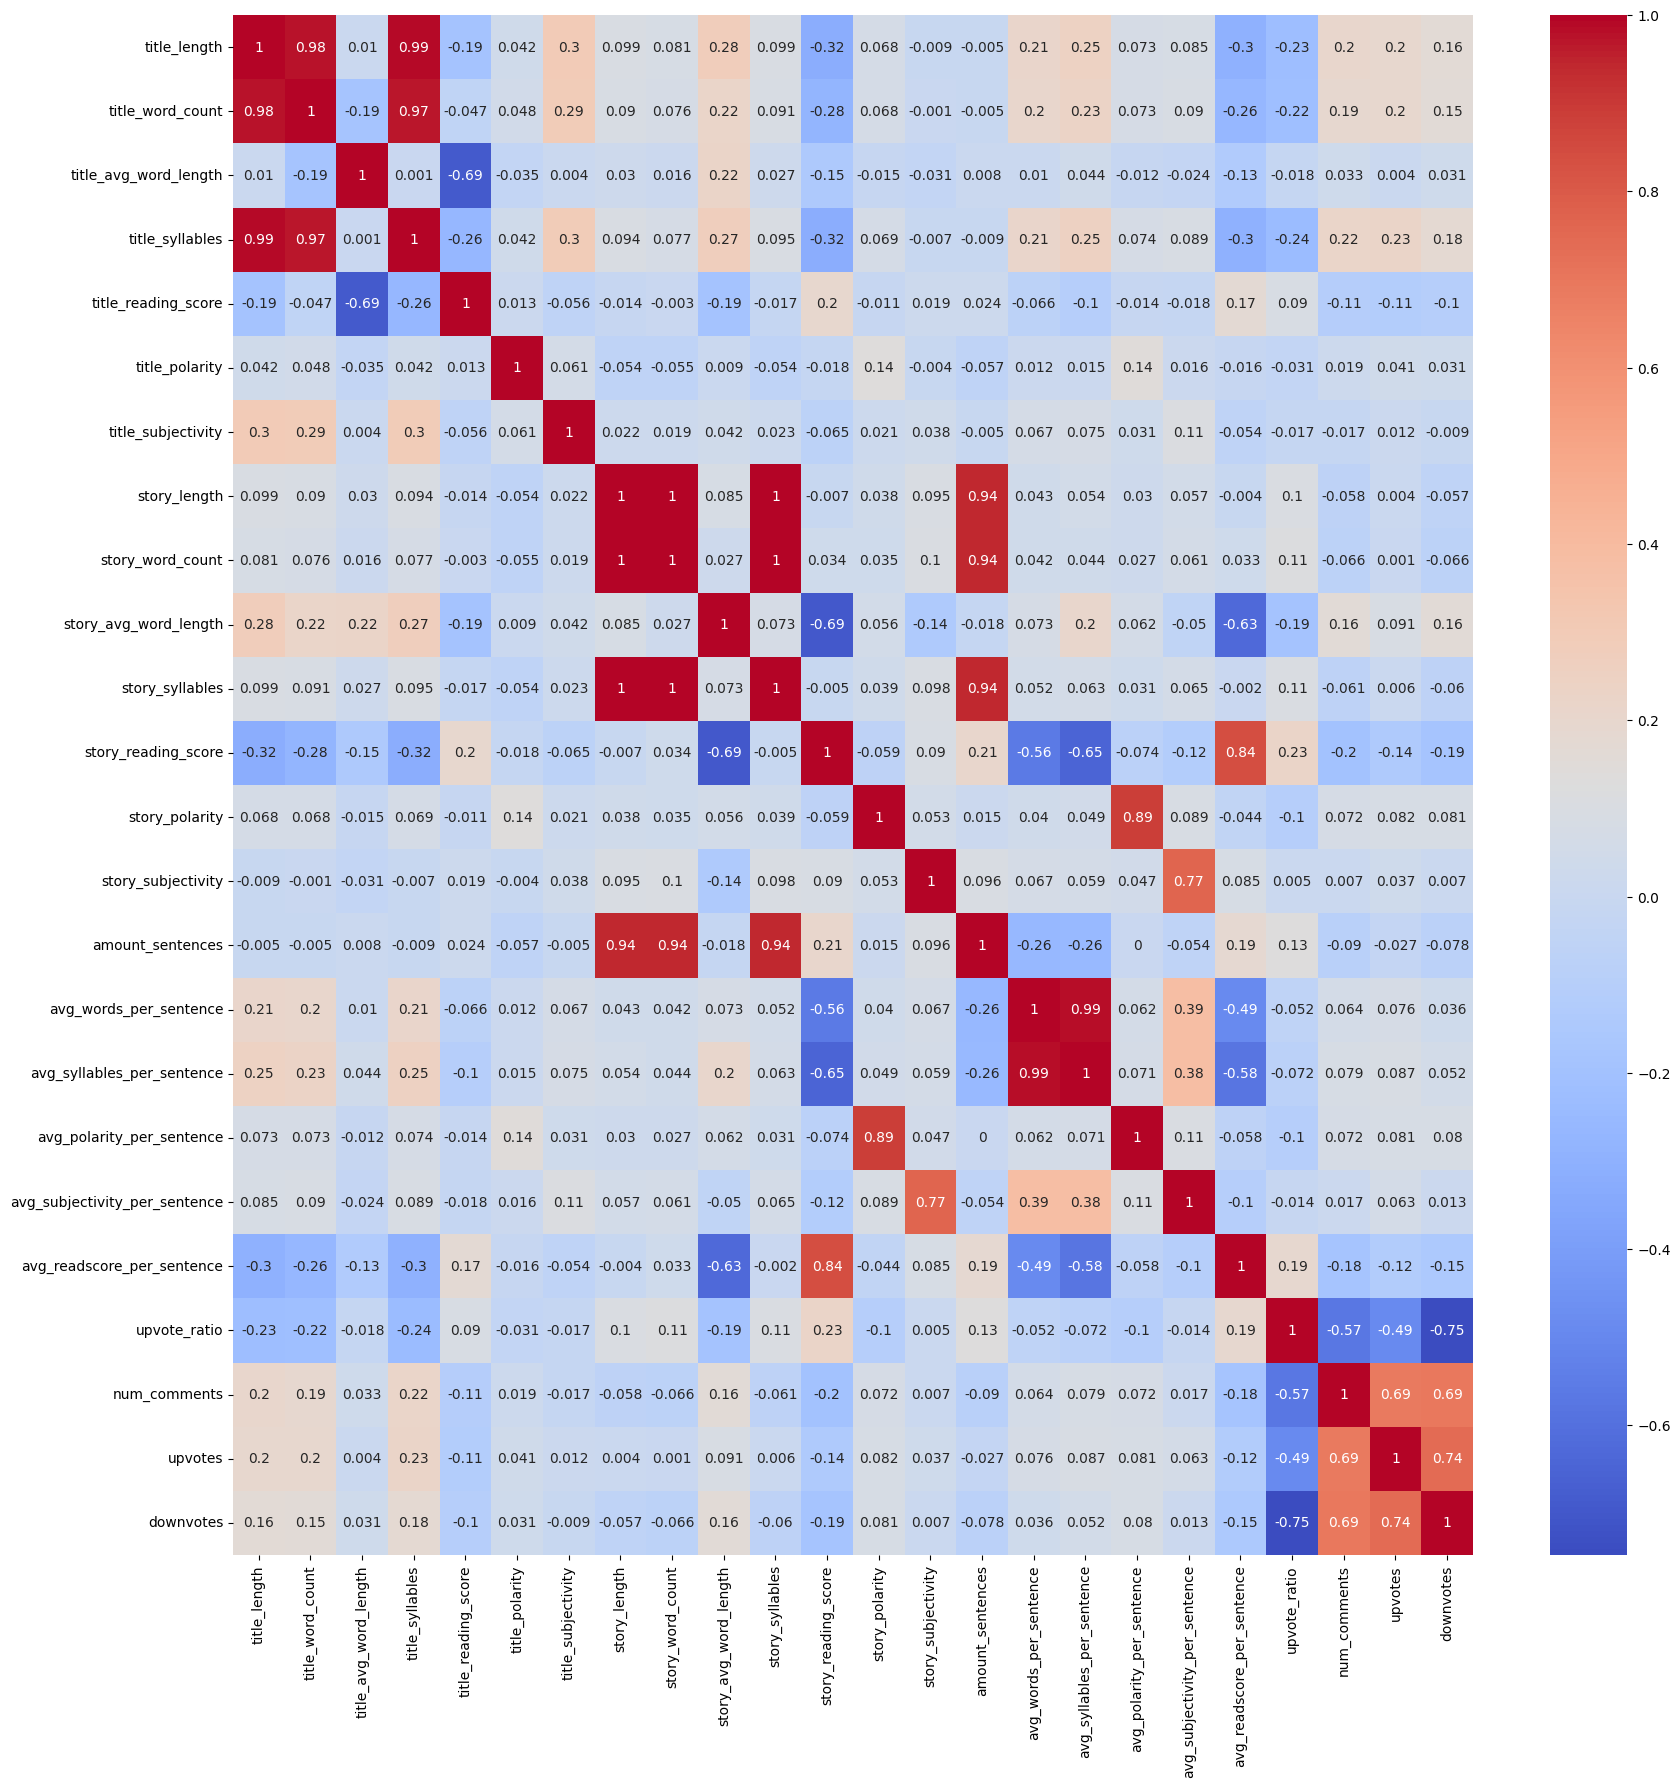

In [75]:
#Heatmap of the cube rooted metrics
cbrt_df = normalize_df(df, numerical_columns, success_metrics, 1e-20, 3)
heatmap(cbrt_df)

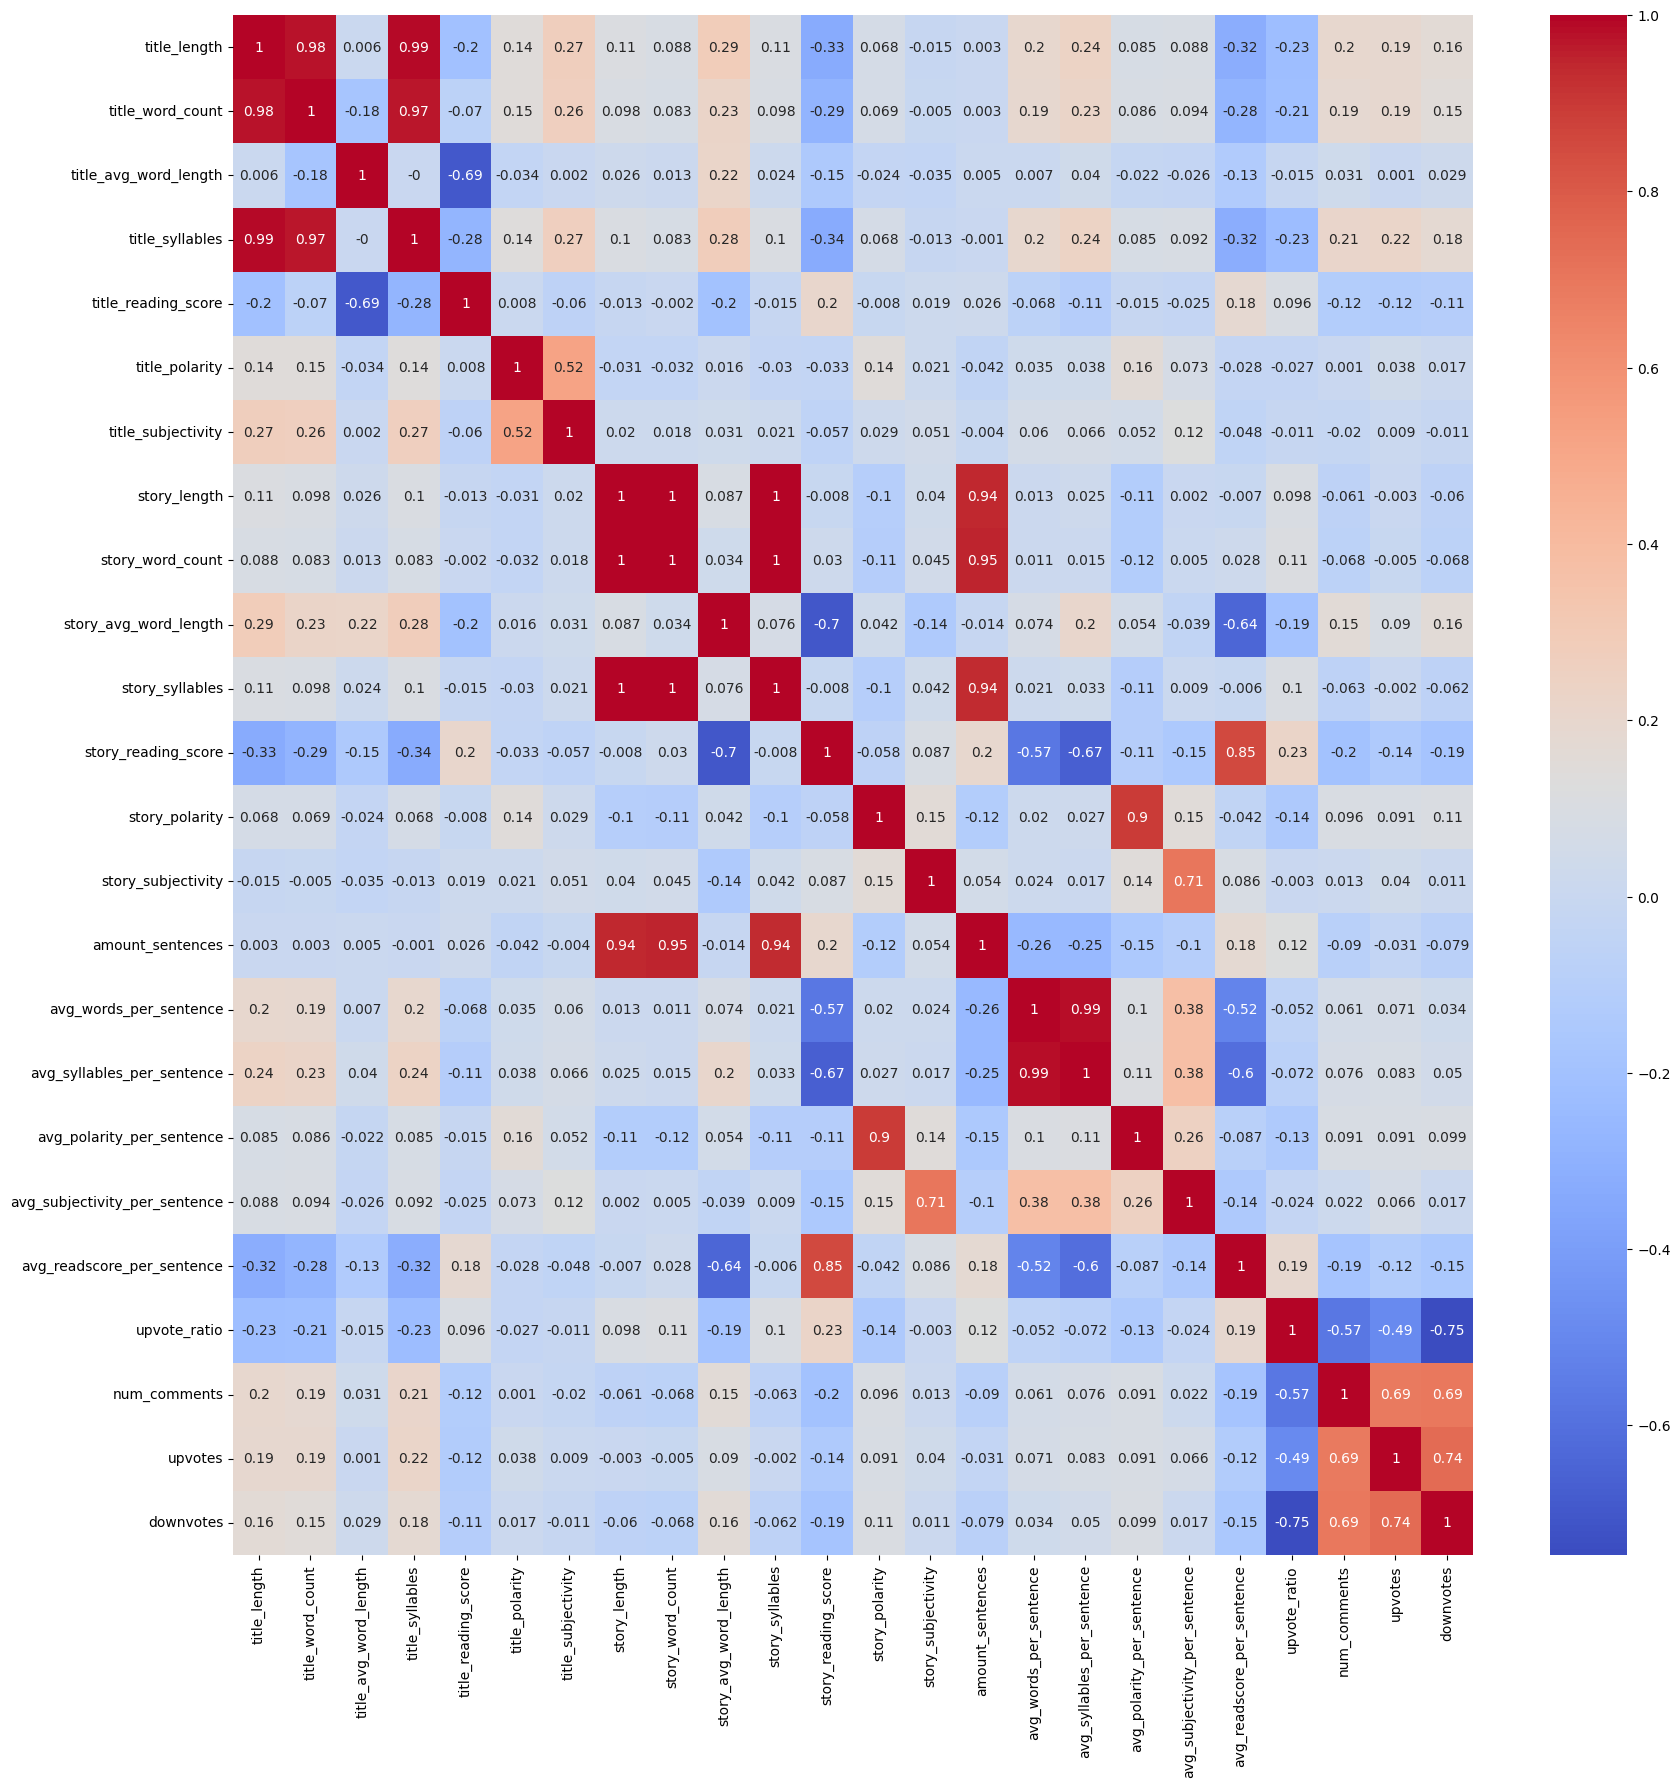

In [76]:
#Heatmap of the square rooted metrics
sqrt_df = normalize_df(df, numerical_columns, success_metrics, 1e-20, 2)
heatmap(sqrt_df)

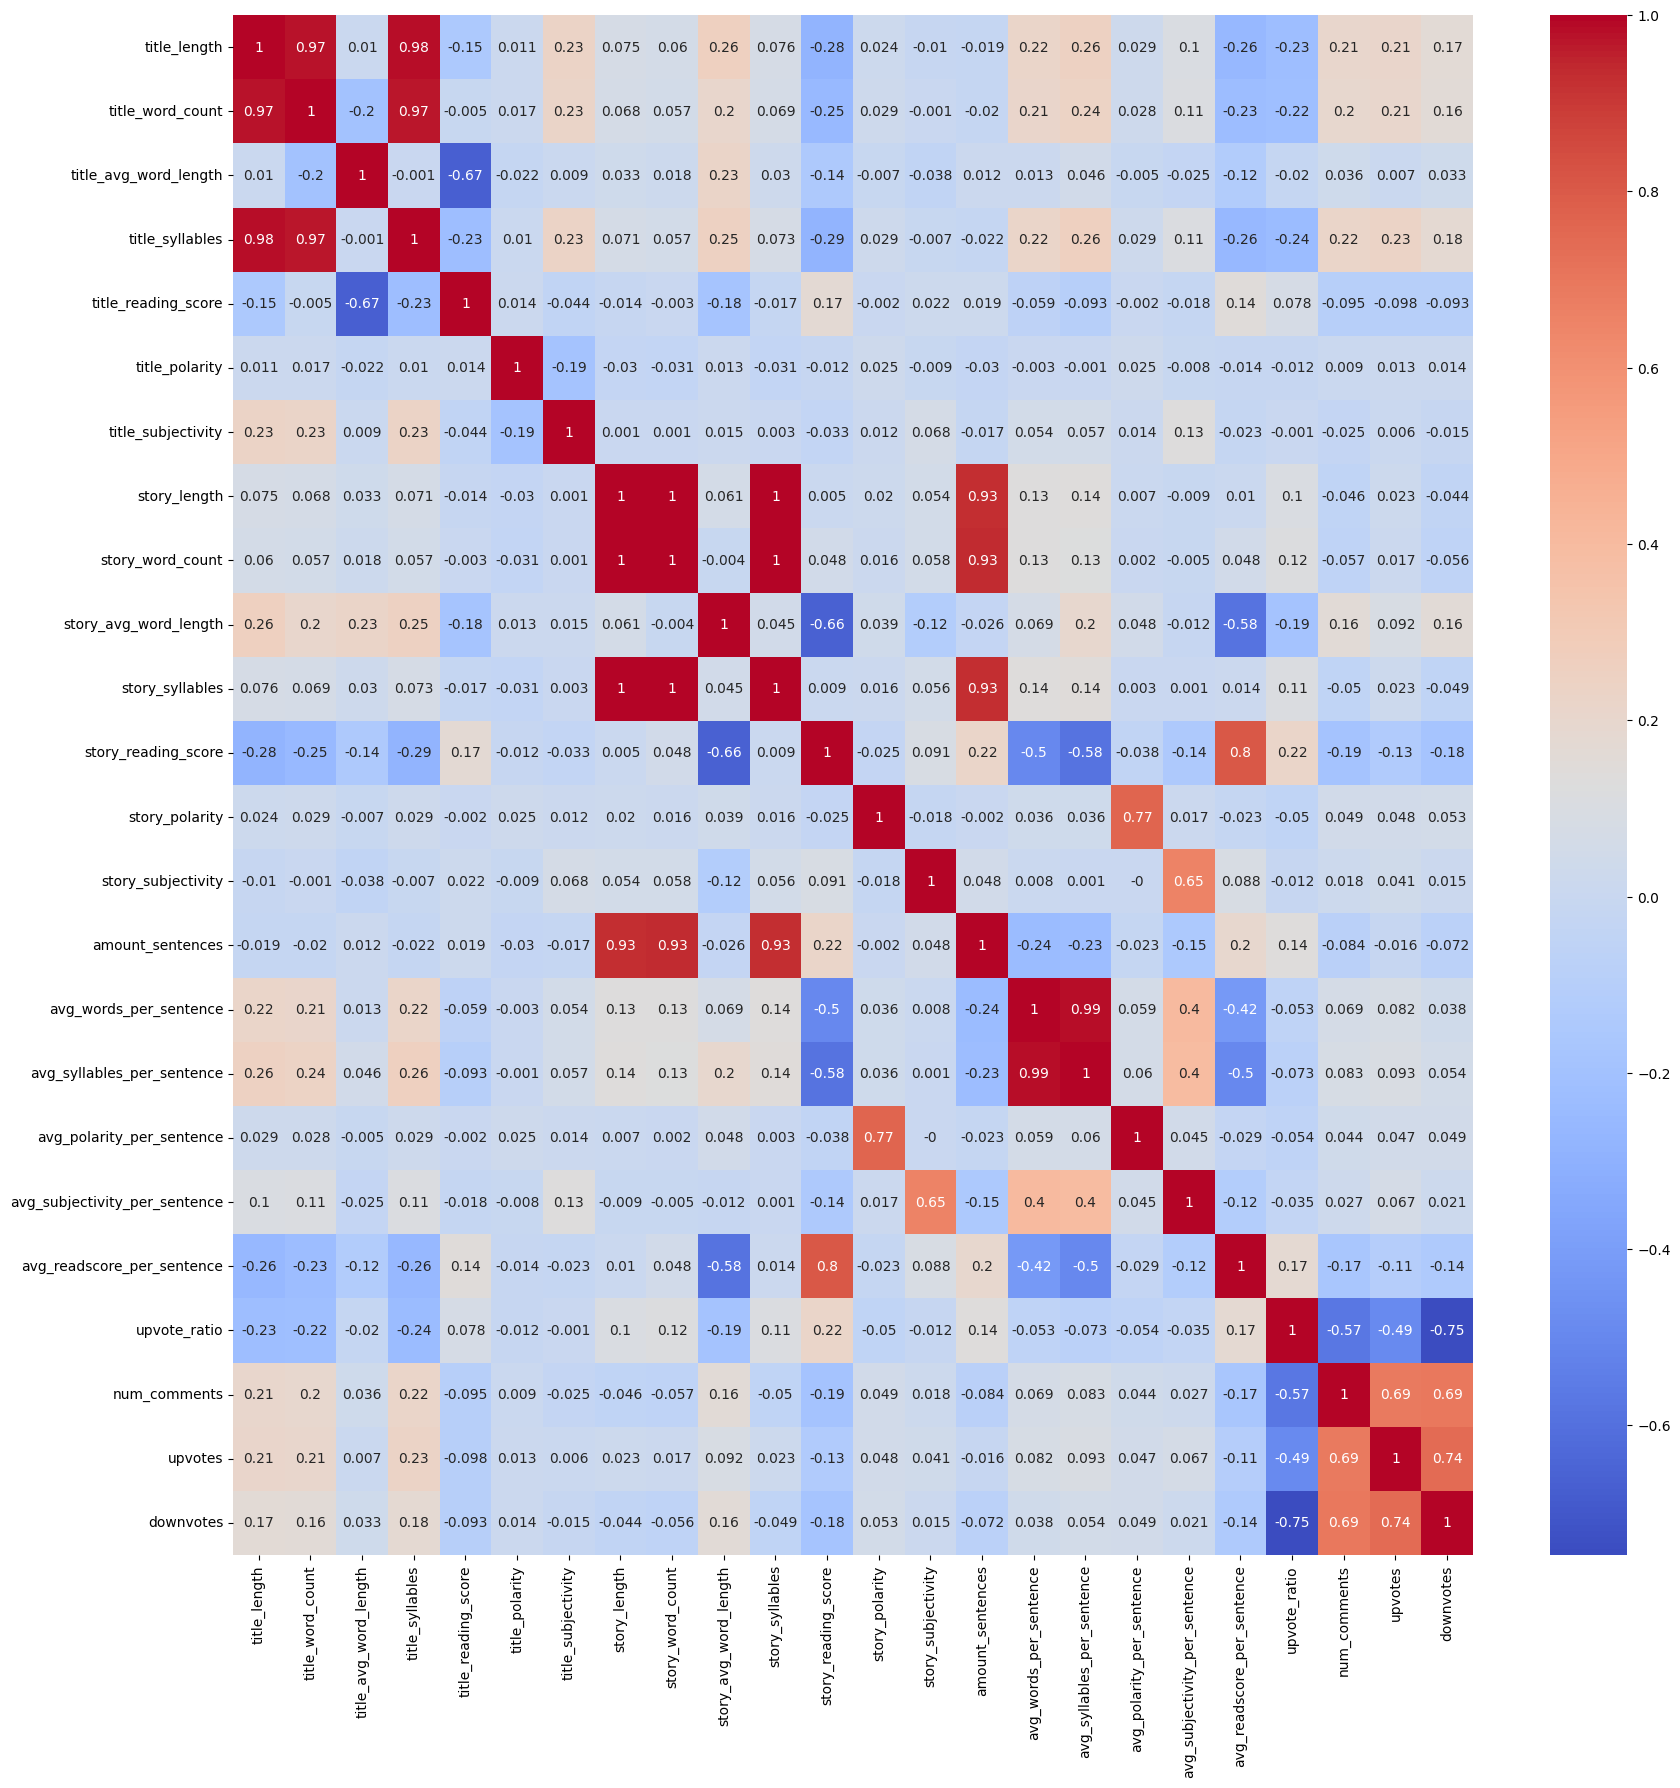

In [77]:
#Heatmap of the log'd metrics
log_df = normalize_df(df, numerical_columns, success_metrics, 1e-20, 1)
heatmap(log_df)

### General plots between success metrics and other variables

In [39]:
def plot(data, xvars, yvars):
    sns.pairplot(
        data,
        x_vars=xvars,
        y_vars=yvars,
    )   

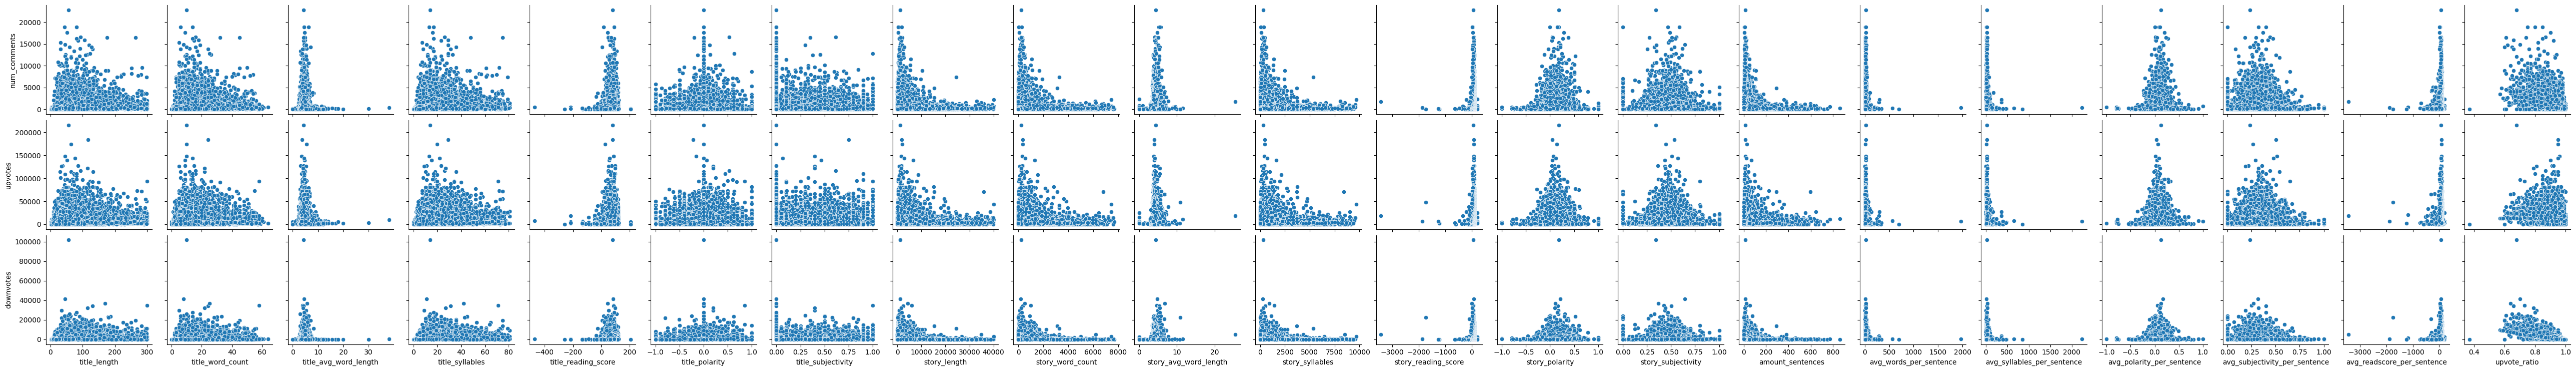

In [36]:
plot(df, numerical_columns, success_metrics)

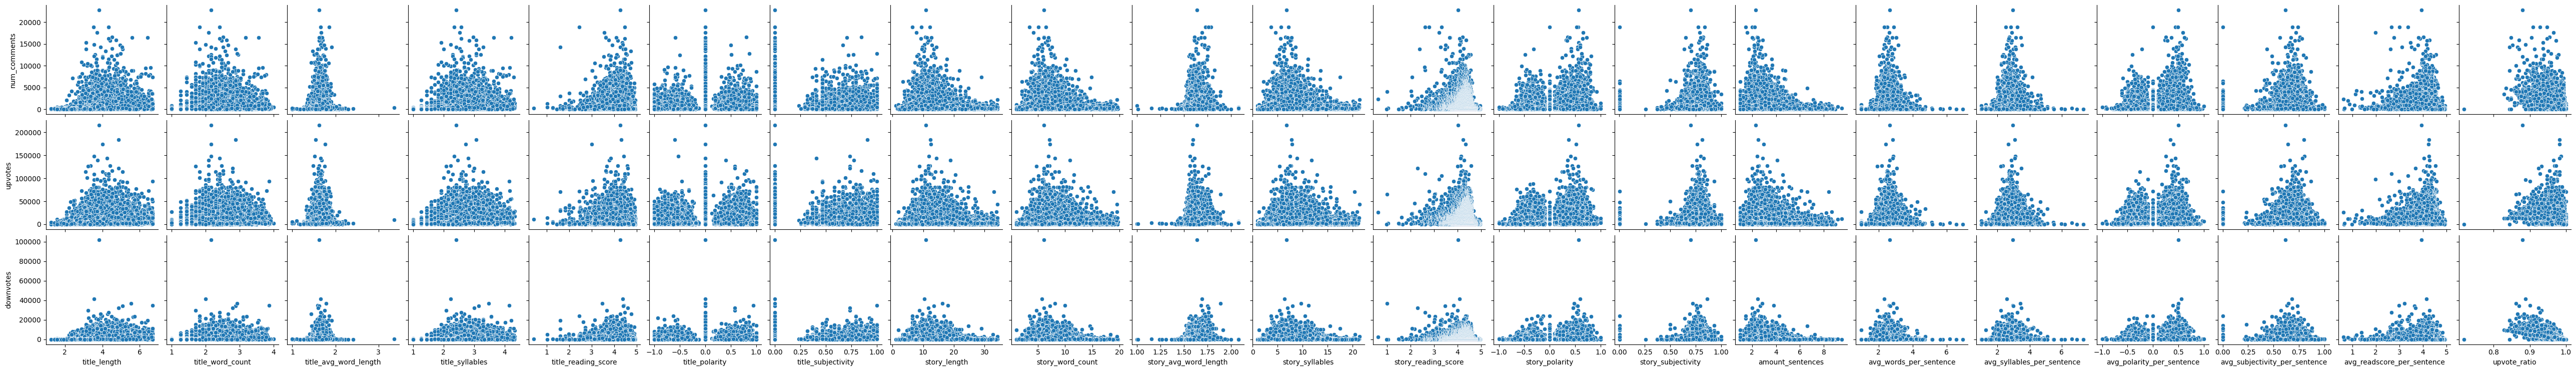

In [79]:
plot(cbrt_df, numerical_columns, success_metrics)

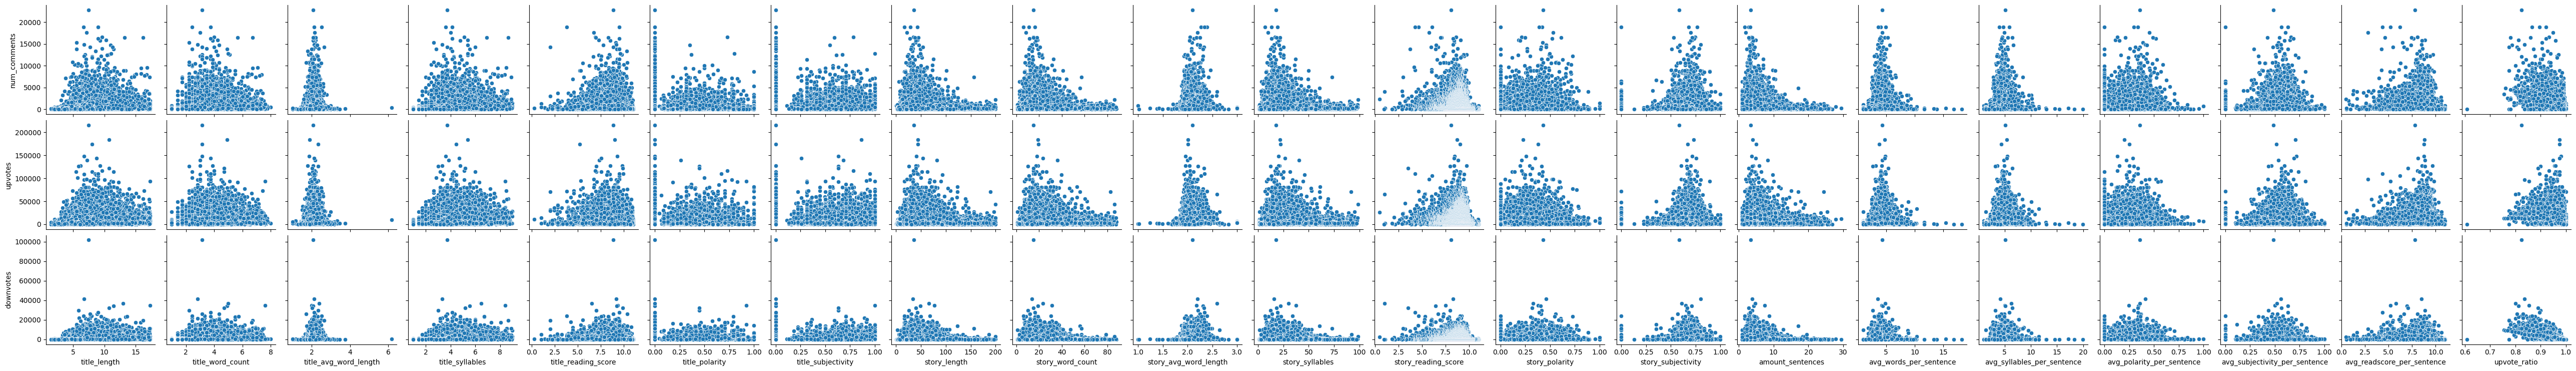

In [80]:
plot(sqrt_df, numerical_columns, success_metrics)

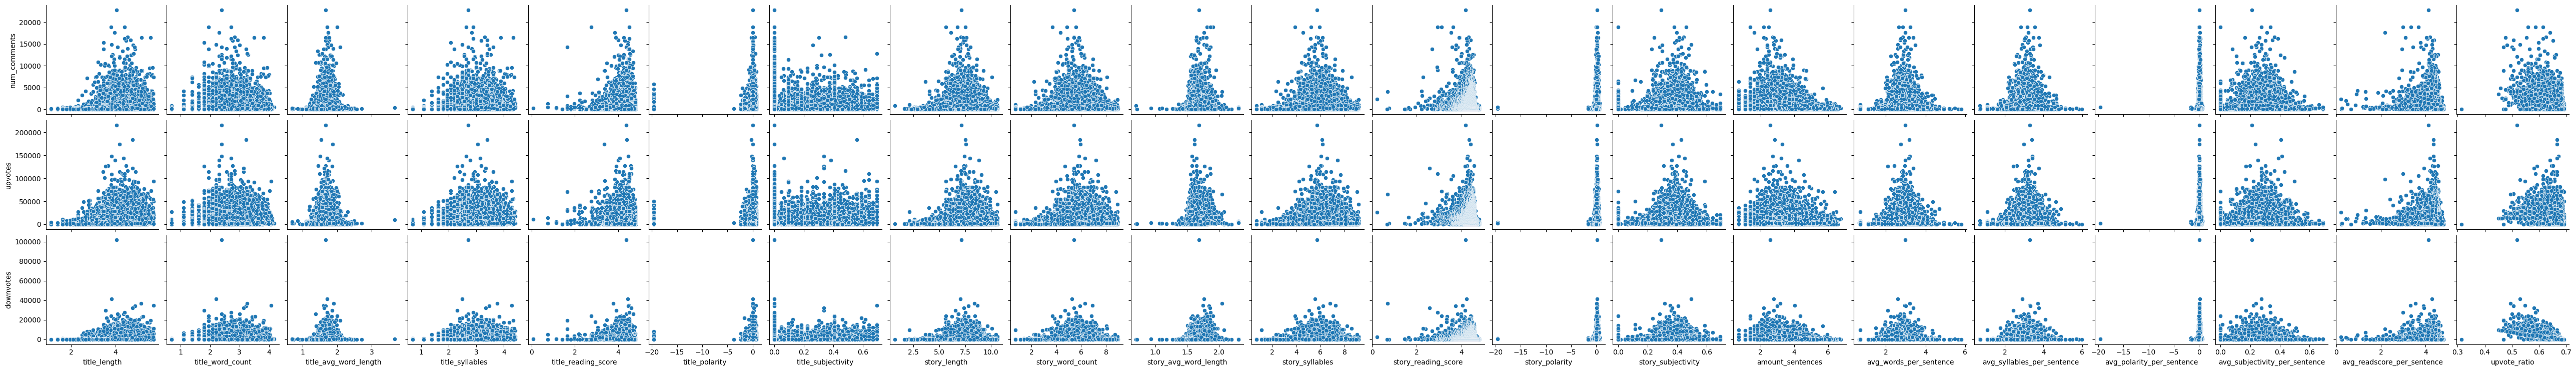

In [78]:
plot(log_df, numerical_columns, success_metrics)

General impressions:
- There seems to be a lot of skew within the data, most relationships are nonlinear, if not all.
- Some plots seem to have a normal distribution but most seem to be non-normal distributions.
- The plots of upvotes, comments, and downvotes all look relatively the same and so one can be just utilized in order apply to all.
- A/B Testing will be done in order to handle the question of: "What is the best way to optimize a story based on metrics?"

# A/B Test: Function

In [14]:
from scipy.stats import anderson, levene, ttest_ind, mannwhitneyu, shapiro
def ab_test(data, variable, success_metric):
    median = data[variable].median()
    lower_bound = data[data[variable] <= median].sample(10000)
    upper_bound = data[data[variable] > median]
    
    lower_normality = shapiro(lower_bound[success_metric])
    upper_normality = shapiro(upper_bound[success_metric])
    
    return lower_normality
    

In [15]:
ab_test(df, 'story_polarity', 'upvotes')

k:\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6251968741416931, pvalue=0.0)

Mean Squared Error: 131276756.15442008
R-squared: 0.10006157825054274


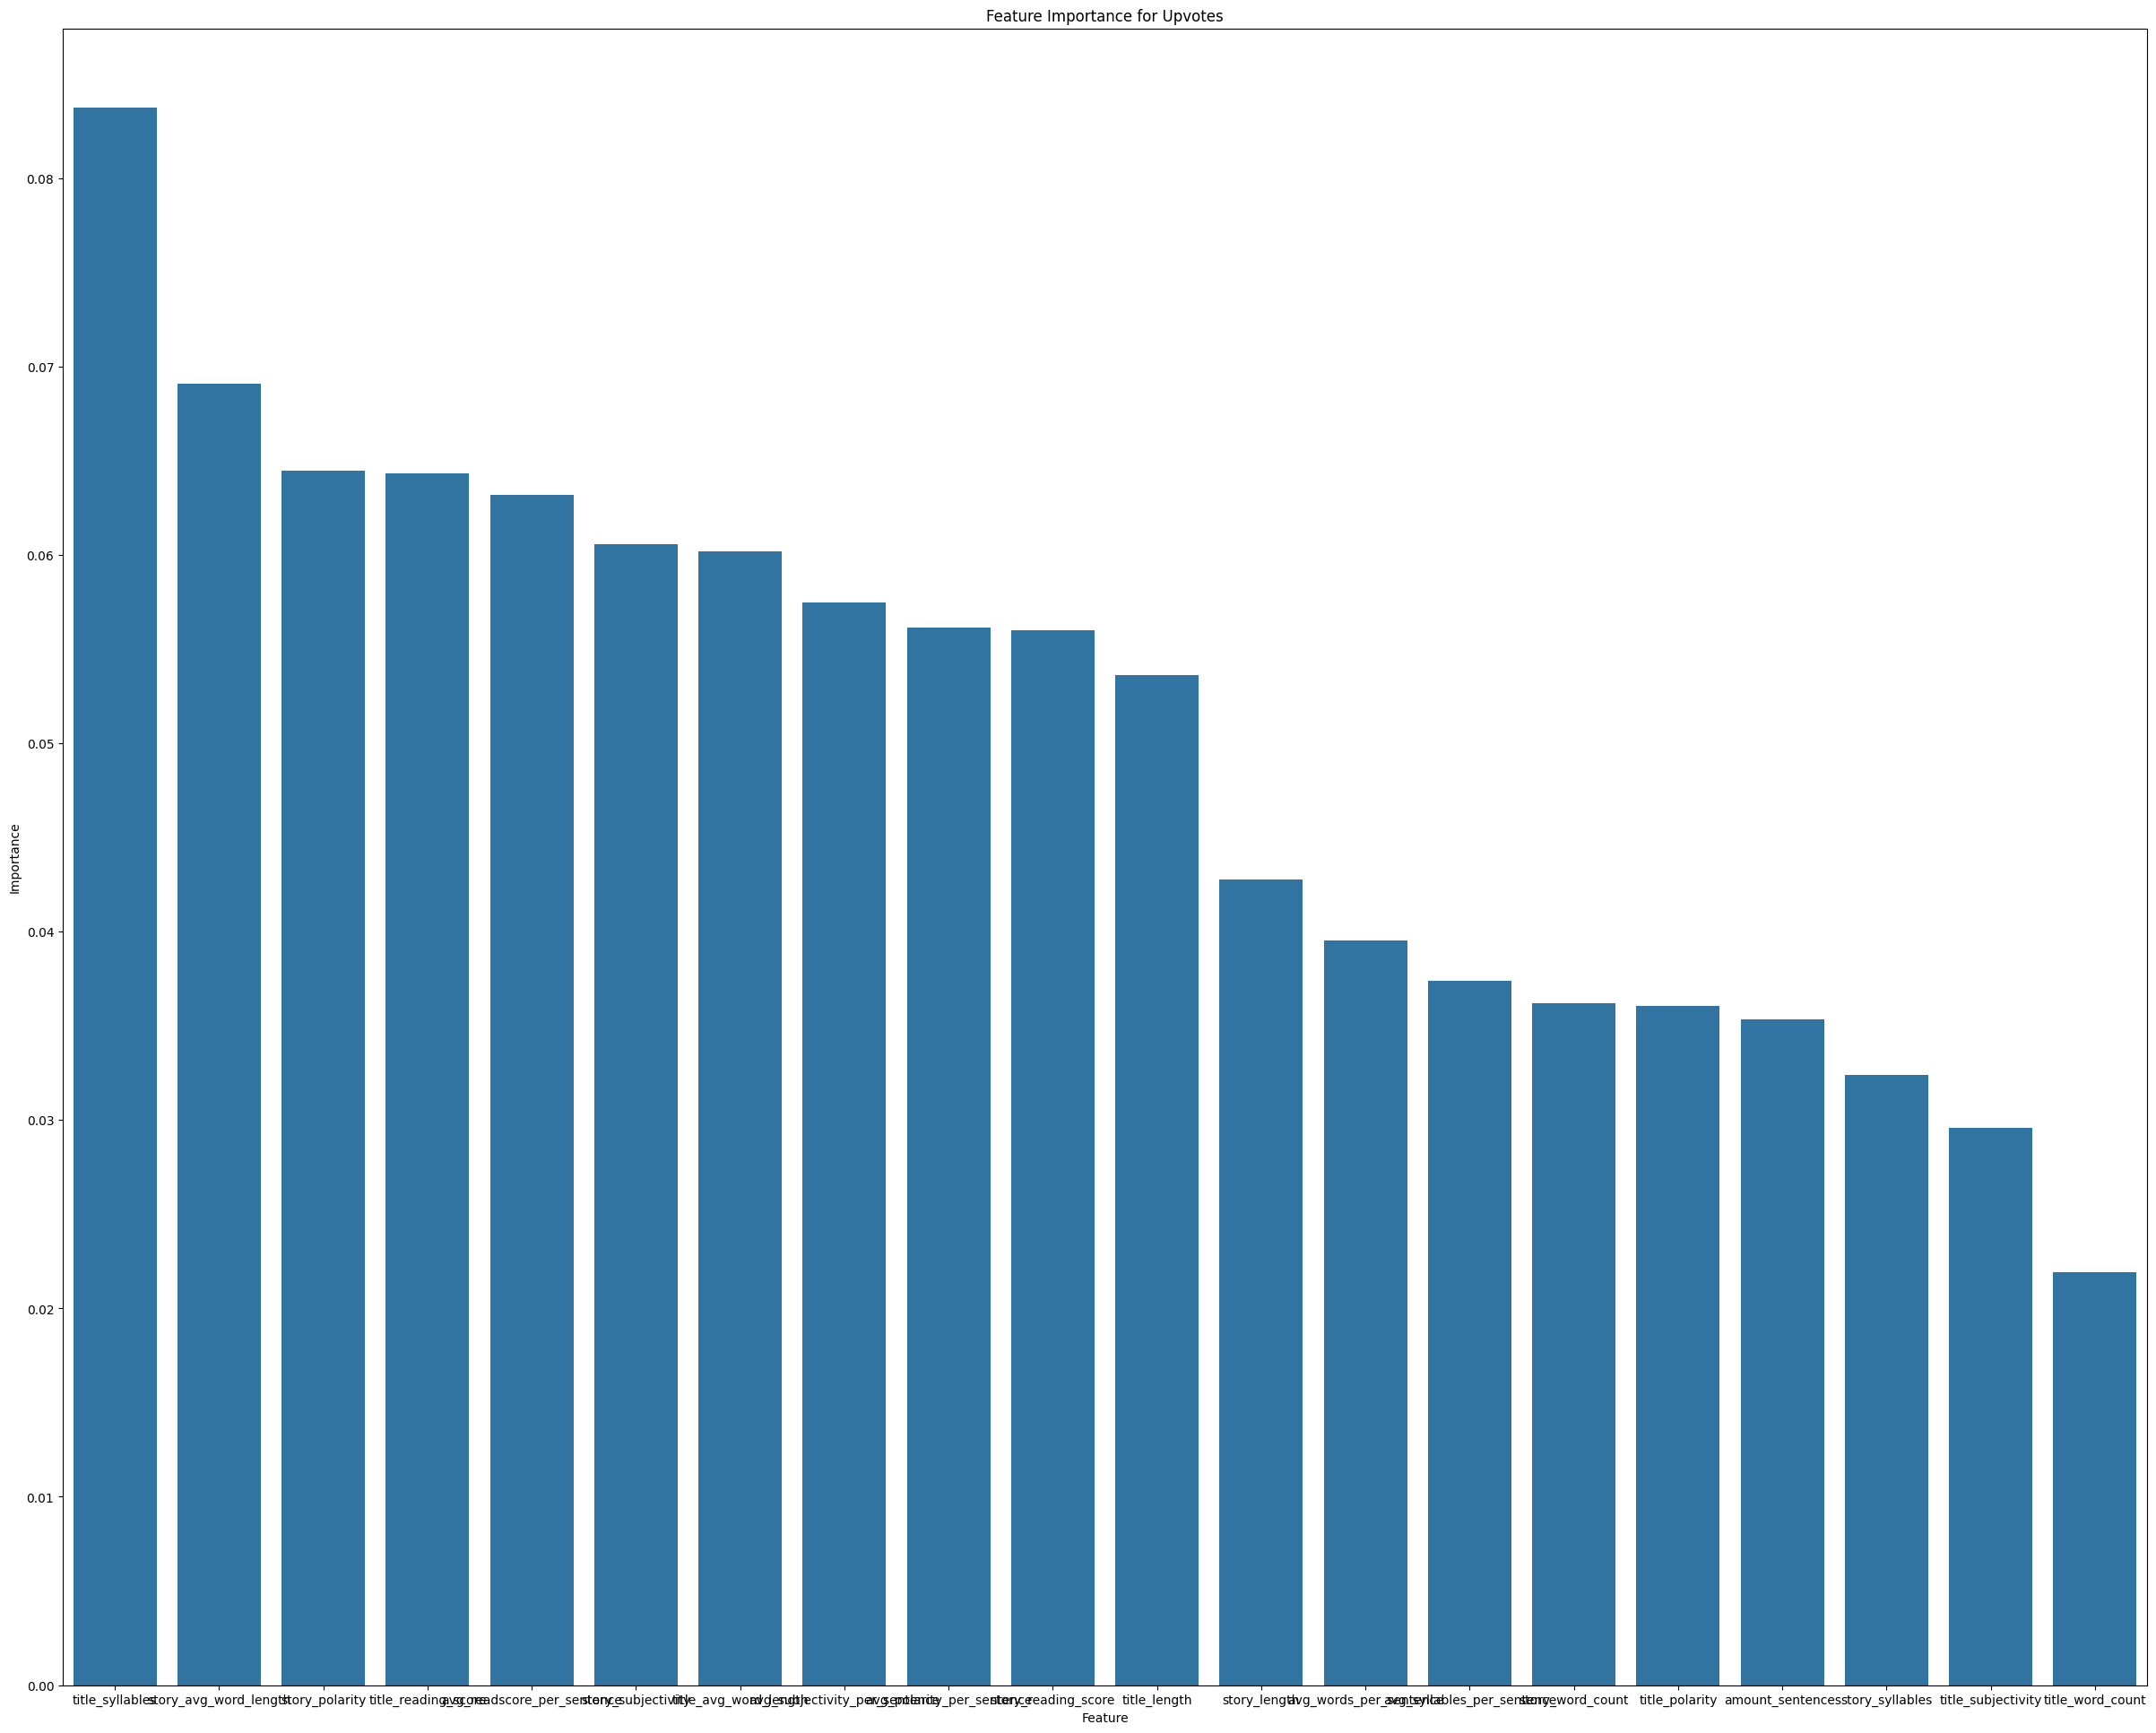

In [32]:

import pandas as pd

# Load the dataset
df = pd.read_excel('storiesDB.xlsx')


X = df[numerical_columns]
y = df['upvotes']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=numerical_columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(30, 24))
sns.barplot(x=feature_importances.index, y='importance', data=feature_importances)
plt.title('Feature Importance for Upvotes')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()